# *Data Cleaning and Outlier Detection*

## Import Libraries

First, we import the necessary libraries.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
df_germany = pd.read_excel('../data /imf_GERMANY_data.xlsx')

# Load the second XLSX file into a DataFrame
df_us = pd.read_excel('../data /imf_US_data.xlsx')

In [4]:
df_germany.rename(columns={'International Financial Statistics (IFS)': 'Month'}, inplace=True)

# Rename the unnamed columns based on the provided names
new_column_names = [
    'Month',
    'Economic Activity, Industrial Production, Index',
    'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate',
    'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar',
    'Prices, Consumer Price Index, All items, Index'
]
df_germany.columns = new_column_names
df_germany = df_germany.drop([0, 1])

In [5]:
df_us.rename(columns={'International Financial Statistics (IFS)': 'Month'}, inplace=True)

# Rename the unnamed columns based on the provided names
new_column_names1 = [
    'Month',
    'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar',
    'Prices, Consumer Price Index, All items, Index'
]

df_us.columns = new_column_names1
df_us = df_us.drop([0, 1,])

df_germany['Country'] = 'Germany'
df_us['Country'] = 'US'

# Merge the two DataFrames
merged_df = pd.concat([df_germany, df_us], ignore_index=True)


In [6]:
columns = ['Month', 'Country', 'Economic Activity, Industrial Production, Index',
           'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate',
           'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar',
           'Prices, Consumer Price Index, All items, Index']

merged_df = merged_df[columns]


In [7]:
df_germany = merged_df[merged_df['Country'] == 'Germany']
df_us = merged_df[merged_df['Country'] == 'US']

# Reset index for both DataFrames
df_germany.reset_index(drop=True, inplace=True)
df_us.reset_index(drop=True, inplace=True)

# Calculate the ratio of US CPI to Germany CPI
cpi_ratio = df_us['Prices, Consumer Price Index, All items, Index'].values / df_germany['Prices, Consumer Price Index, All items, Index'].values

# Calculate the monthly growth in the nominal exchange rate for Germany
df_germany['Real Exchange Rate'] = cpi_ratio * df_germany['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate']

# Add the new variable to the original merged DataFrame
merged_df.loc[merged_df['Country'] == 'Germany', 'Real Exchange Rate'] = df_germany['Real Exchange Rate']

# Rename the column
merged_df.rename(columns={'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate': 'Nominal Exchange Rate'}, inplace=True)



/var/folders/16/ybdglc7d23vfl64gx8z5bp6m0000gn/T/ipykernel_87736/3081440155.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany['Real Exchange Rate'] = cpi_ratio * df_germany['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate']


In [8]:
# Calculate the percentage change in the nominal exchange rate only for Germany
merged_df.loc[merged_df["Country"] == "Germany", "Nominal Exchange Rate Growth (%)"] = (
    merged_df.loc[merged_df["Country"] == "Germany", "Nominal Exchange Rate"].pct_change() * 100
)

# Calculate the percentage change in the real exchange rate only for Germany
merged_df.loc[merged_df["Country"] == "Germany", "Real Exchange Rate Growth (%)"] = (
    merged_df.loc[merged_df["Country"] == "Germany", "Real Exchange Rate"].pct_change() * 100
)




/var/folders/16/ybdglc7d23vfl64gx8z5bp6m0000gn/T/ipykernel_87736/1448738395.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.loc[merged_df["Country"] == "Germany", "Nominal Exchange Rate"].pct_change() * 100
/var/folders/16/ybdglc7d23vfl64gx8z5bp6m0000gn/T/ipykernel_87736/1448738395.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.loc[merged_df["Country"] == "Germany", "Real Exchange Rate"].pct_change() * 100


In [9]:
# Filter for Germany and find the Real Exchange Rate for December 1990
rer_dec_1990 = merged_df.loc[(merged_df["Country"] == "Germany") & 
                             (merged_df["Month"] == "Dec 1990"), 
                             "Real Exchange Rate"].values[0]

# Construct the RER Index for Germany
merged_df.loc[merged_df["Country"] == "Germany", "RER_Index"] = (
    merged_df.loc[merged_df["Country"] == "Germany", "Real Exchange Rate"] / rer_dec_1990
)

In [10]:
merged_df

,Month,Country,"Economic Activity, Industrial Production, Index",Nominal Exchange Rate,"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index",Real Exchange Rate,Nominal Exchange Rate Growth (%),Real Exchange Rate Growth (%),RER_Index
0,Dec 1959,Germany,32.500305,4.2,4811.474341,24.616929,2.300359,NaN,NaN,1.713301
1,Jan 1960,Germany,31.193881,4.2,4724.155785,24.616929,2.292535,0.0,-0.340136,1.707474
2,Feb 1960,Germany,31.041599,4.2,4806.36283,24.477068,2.313504,0.0,0.914640,1.723091
3,Mar 1960,Germany,32.203755,4.2,4966.456016,24.477068,2.313504,0.0,0.000000,1.723091
4,Apr 1960,Germany,34.287622,4.2,5236.120624,24.616929,2.308184,0.0,-0.229943,1.719129
...,...,...,...,...,...,...,...,...,...,...
741,Aug 1990,US,NaN,NaN,78908.838357,60.351608,NaN,NaN,NaN,NaN
742,Sep 1990,US,NaN,NaN,80024.166133,60.856066,NaN,NaN,NaN,NaN
743,Oct 1990,US,NaN,NaN,82852.196532,61.222946,NaN,NaN,NaN,NaN
744,Nov 1990,US,NaN,NaN,83059.402774,61.360525,NaN,NaN,NaN,NaN


In [11]:
# Compute Monthly Inflation Growth (%) for both US and Germany
merged_df["Monthly Inflation Growth (%)"] = merged_df.groupby("Country")[
    "Prices, Consumer Price Index, All items, Index"
].pct_change() * 100

pd.reset_option("display.max_rows")


In [12]:
# Compute Monthly Industrial Production Growth (%) for only Germany
merged_df.loc[merged_df["Country"] == "Germany", "Monthly Industrial Production Growth (%)"] = (
    merged_df.loc[merged_df["Country"] == "Germany", "Economic Activity, Industrial Production, Index"].pct_change() * 100
)

# Compute Yearly Industrial Production Growth (%) for only Germany (12-month difference)
merged_df.loc[merged_df["Country"] == "Germany", "Industrial Production YoY Growth (%)"] = (
    merged_df.loc[merged_df["Country"] == "Germany", "Economic Activity, Industrial Production, Index"].pct_change(periods=12) * 100
)
merged_df

/var/folders/16/ybdglc7d23vfl64gx8z5bp6m0000gn/T/ipykernel_87736/2244374788.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.loc[merged_df["Country"] == "Germany", "Economic Activity, Industrial Production, Index"].pct_change() * 100
/var/folders/16/ybdglc7d23vfl64gx8z5bp6m0000gn/T/ipykernel_87736/2244374788.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.loc[merged_df["Country"] == "Germany", "Economic Activity, Industrial Production, Index"].pct_change(periods=12) * 100


,Month,Country,"Economic Activity, Industrial Production, Index",Nominal Exchange Rate,"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index",Real Exchange Rate,Nominal Exchange Rate Growth (%),Real Exchange Rate Growth (%),RER_Index,Monthly Inflation Growth (%),Monthly Industrial Production Growth (%),Industrial Production YoY Growth (%)
0,Dec 1959,Germany,32.500305,4.2,4811.474341,24.616929,2.300359,NaN,NaN,1.713301,NaN,NaN,NaN
1,Jan 1960,Germany,31.193881,4.2,4724.155785,24.616929,2.292535,0.0,-0.340136,1.707474,0.0,-4.019729,NaN
2,Feb 1960,Germany,31.041599,4.2,4806.36283,24.477068,2.313504,0.0,0.914640,1.723091,-0.568147,-0.488181,NaN
3,Mar 1960,Germany,32.203755,4.2,4966.456016,24.477068,2.313504,0.0,0.000000,1.723091,0.0,3.743868,NaN
4,Apr 1960,Germany,34.287622,4.2,5236.120624,24.616929,2.308184,0.0,-0.229943,1.719129,0.571393,6.470881,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,Aug 1990,US,NaN,NaN,78908.838357,60.351608,NaN,NaN,NaN,NaN,0.920245,NaN,NaN
742,Sep 1990,US,NaN,NaN,80024.166133,60.856066,NaN,NaN,NaN,NaN,0.835866,NaN,NaN
743,Oct 1990,US,NaN,NaN,82852.196532,61.222946,NaN,NaN,NaN,NaN,0.602864,NaN,NaN
744,Nov 1990,US,NaN,NaN,83059.402774,61.360525,NaN,NaN,NaN,NaN,0.224719,NaN,NaN


In [13]:
# Find the base value of international reserves for January 1960 separately for Germany & US
germany_base_reserves = merged_df.loc[
    (merged_df["Country"] == "Germany") & (merged_df["Month"] == "Jan 1960"),
    "International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar"
].values[0]

us_base_reserves = merged_df.loc[
    (merged_df["Country"] == "US") & (merged_df["Month"] == "Jan 1960"),
    "International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar"
].values[0]

# Compute the International Reserves Index for Germany
merged_df.loc[merged_df["Country"] == "Germany", "International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar"] = (
    merged_df.loc[merged_df["Country"] == "Germany", "International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar"] / germany_base_reserves * 100
)

# Compute the International Reserves Index for the US
merged_df.loc[merged_df["Country"] == "US", "International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar"] = (
    merged_df.loc[merged_df["Country"] == "US", "International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar"] / us_base_reserves * 100
)

merged_df.rename(
    columns={"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar": 
             "International Reserves Index"}, 
    inplace=True
)

# Display first few rows to verify
merged_df


,Month,Country,"Economic Activity, Industrial Production, Index",Nominal Exchange Rate,International Reserves Index,"Prices, Consumer Price Index, All items, Index",Real Exchange Rate,Nominal Exchange Rate Growth (%),Real Exchange Rate Growth (%),RER_Index,Monthly Inflation Growth (%),Monthly Industrial Production Growth (%),Industrial Production YoY Growth (%)
0,Dec 1959,Germany,32.500305,4.2,101.848342,24.616929,2.300359,NaN,NaN,1.713301,NaN,NaN,NaN
1,Jan 1960,Germany,31.193881,4.2,100.0,24.616929,2.292535,0.0,-0.340136,1.707474,0.0,-4.019729,NaN
2,Feb 1960,Germany,31.041599,4.2,101.740143,24.477068,2.313504,0.0,0.914640,1.723091,-0.568147,-0.488181,NaN
3,Mar 1960,Germany,32.203755,4.2,105.128964,24.477068,2.313504,0.0,0.000000,1.723091,0.0,3.743868,NaN
4,Apr 1960,Germany,34.287622,4.2,110.837171,24.616929,2.308184,0.0,-0.229943,1.719129,0.571393,6.470881,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,Aug 1990,US,NaN,NaN,367.39208,60.351608,NaN,NaN,NaN,NaN,0.920245,NaN,NaN
742,Sep 1990,US,NaN,NaN,372.584941,60.856066,NaN,NaN,NaN,NaN,0.835866,NaN,NaN
743,Oct 1990,US,NaN,NaN,385.751982,61.222946,NaN,NaN,NaN,NaN,0.602864,NaN,NaN
744,Nov 1990,US,NaN,NaN,386.716715,61.360525,NaN,NaN,NaN,NaN,0.224719,NaN,NaN


In [14]:
# List of columns to drop
columns_to_drop = [
    'Economic Activity, Industrial Production, Index',
    'Nominal Exchange Rate',
    'Prices, Consumer Price Index, All items, Index',
    'Real Exchange Rate',
]

# Drop the columns from the DataFrame
merged_df = merged_df.drop(columns=columns_to_drop, errors='ignore')


In [15]:
merged_df

,Month,Country,International Reserves Index,Nominal Exchange Rate Growth (%),Real Exchange Rate Growth (%),RER_Index,Monthly Inflation Growth (%),Monthly Industrial Production Growth (%),Industrial Production YoY Growth (%)
0,Dec 1959,Germany,101.848342,NaN,NaN,1.713301,NaN,NaN,NaN
1,Jan 1960,Germany,100.0,0.0,-0.340136,1.707474,0.0,-4.019729,NaN
2,Feb 1960,Germany,101.740143,0.0,0.914640,1.723091,-0.568147,-0.488181,NaN
3,Mar 1960,Germany,105.128964,0.0,0.000000,1.723091,0.0,3.743868,NaN
4,Apr 1960,Germany,110.837171,0.0,-0.229943,1.719129,0.571393,6.470881,NaN
...,...,...,...,...,...,...,...,...,...
741,Aug 1990,US,367.39208,NaN,NaN,NaN,0.920245,NaN,NaN
742,Sep 1990,US,372.584941,NaN,NaN,NaN,0.835866,NaN,NaN
743,Oct 1990,US,385.751982,NaN,NaN,NaN,0.602864,NaN,NaN
744,Nov 1990,US,386.716715,NaN,NaN,NaN,0.224719,NaN,NaN


In [16]:
# Define a function to detect strict (fewer) outliers
def detect_outliers_strict(df, column, iqr_threshold=2.5, z_threshold=3.0):  
    # Compute IQR bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - iqr_threshold * IQR
    upper_bound_iqr = Q3 + iqr_threshold * IQR
    
    # Compute Z-score bounds
    mean = df[column].mean()
    std_dev = df[column].std()
    lower_bound_z = mean - z_threshold * std_dev
    upper_bound_z = mean + z_threshold * std_dev

    # Ensure fewer values are flagged (outliers must violate both conditions)
    return (df[column] < lower_bound_iqr) & (df[column] < lower_bound_z) | \
           (df[column] > upper_bound_iqr) & (df[column] > upper_bound_z)

# Apply function to numeric columns
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns
outlier_locations = []

for col in numeric_columns:
    outliers = detect_outliers_strict(merged_df, col, iqr_threshold=2.5, z_threshold=3.0)
    
    # Store row index, month, column, and outlier value
    for index in merged_df[outliers].index:
        outlier_locations.append((index, merged_df.loc[index, "Month"], col, merged_df.loc[index, col]))

# Convert outlier locations to a DataFrame for easier viewing
outliers_df = pd.DataFrame(outlier_locations, columns=["Row Index", "Month", "Column", "Outlier Value"])

# Display detected outliers with the Month column
print("Detected Outliers with Month Information:")
print(outliers_df)


Detected Outliers with Month Information:
    Row Index     Month                                Column  Outlier Value
0         119  Nov 1969      Nominal Exchange Rate Growth (%)      -8.500000
1         162  Jun 1973      Nominal Exchange Rate Growth (%)      -7.669997
2         163  Jul 1973      Nominal Exchange Rate Growth (%)      -9.474501
3         167  Nov 1973      Nominal Exchange Rate Growth (%)       6.913703
4         254  Feb 1981      Nominal Exchange Rate Growth (%)       6.774258
5         119  Nov 1969         Real Exchange Rate Growth (%)      -8.217983
6         145  Jan 1972         Real Exchange Rate Growth (%)      -7.990670
7         162  Jun 1973         Real Exchange Rate Growth (%)      -7.554545
8         163  Jul 1973         Real Exchange Rate Growth (%)      -9.603880
9         243  Mar 1980         Real Exchange Rate Growth (%)       7.022401
10        254  Feb 1981         Real Exchange Rate Growth (%)       7.043635
11        102  Jun 1968  Industria

In [17]:
# Convert 'Month' to extract year (assuming format 'Jan 1973')
outliers_df['Year'] = outliers_df['Month'].str[-4:].astype(int)

# Define valid year range (±5 years from 1973)
valid_year_range = (outliers_df['Year'] >= 1968) & (outliers_df['Year'] <= 1978)

# Filter out only those outliers that are outside the valid range
outliers_to_replace = outliers_df[~valid_year_range]  # Invert the filter (~)

# Apply NaN to these specific outliers in merged_df
for _, row in outliers_to_replace.iterrows():
    merged_df.loc[row["Row Index"], row["Column"]] = np.nan

# Display summary of changes
print("Outliers replaced with NaN (Years outside 1968-1978):")
print(outliers_to_replace)


Outliers replaced with NaN (Years outside 1968-1978):
    Row Index     Month                            Column  Outlier Value  Year
4         254  Feb 1981  Nominal Exchange Rate Growth (%)       6.774258  1981
9         243  Mar 1980     Real Exchange Rate Growth (%)       7.022401  1980
10        254  Feb 1981     Real Exchange Rate Growth (%)       7.043635  1981


In [18]:
merged_df.loc[254] #check whether the value has been replaced with NaN


Month                                          Feb 1981
Country                                         Germany
International Reserves Index                1139.353417
Nominal Exchange Rate Growth (%)                    NaN
Real Exchange Rate Growth (%)                       NaN
RER_Index                                      1.187437
Monthly Inflation Growth (%)                   0.780227
Monthly Industrial Production Growth (%)       3.293824
Industrial Production YoY Growth (%)          -3.395566
Name: 254, dtype: object

In [19]:
# List of columns where missing values should NOT be handled
columns_to_exclude = [
    "Nominal Exchange Rate Growth (%)",
    "Real Exchange Rate Growth (%)",
    "RER_Index",
    "Monthly Industrial Production Growth (%)",
    "Industrial Production YoY Growth (%)"
]

# Separate data for US (for exclusion in missing value handling)
us_mask = merged_df["Country"] == "US"

# Step 1: Apply interpolation **only to allowed columns** (excluding US for the specific calculations)
for col in merged_df.select_dtypes(include=[np.number]).columns:
    if col not in columns_to_exclude:
        merged_df.loc[~us_mask, col] = merged_df.loc[~us_mask, col].interpolate(method='linear')

# Step 2: Forward-fill and Backward-fill missing values, but **only for allowed columns**
for col in merged_df.select_dtypes(include=[np.number]).columns:
    if col not in columns_to_exclude:
        merged_df[col].ffill(inplace=True)  # Forward fill
        merged_df[col].bfill(inplace=True)  # Backward fill

# Step 3: Special Handling for First Row NaNs
merged_df.fillna(method="bfill", inplace=True)  # Backward fill first row NaNs

# Step 4: As a last resort, fill remaining NaNs with column means (except excluded columns)
for col in merged_df.select_dtypes(include=[np.number]).columns:
    if col not in columns_to_exclude:
        merged_df[col].fillna(merged_df[col].mean(), inplace=True)

/var/folders/16/ybdglc7d23vfl64gx8z5bp6m0000gn/T/ipykernel_87736/3976157605.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method="bfill", inplace=True)  # Backward fill first row NaNs
/var/folders/16/ybdglc7d23vfl64gx8z5bp6m0000gn/T/ipykernel_87736/3976157605.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.fillna(method="bfill", inplace=True)  # Backward fill first row NaNs
/var/folders/16/ybdglc7d23vfl64gx8z5bp6m0000gn/T/ipykernel_87736/3976157605.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method

In [20]:
merged_df

,Month,Country,International Reserves Index,Nominal Exchange Rate Growth (%),Real Exchange Rate Growth (%),RER_Index,Monthly Inflation Growth (%),Monthly Industrial Production Growth (%),Industrial Production YoY Growth (%)
0,Dec 1959,Germany,101.848342,0.0,-0.340136,1.713301,0.000000,-4.019729,10.900123
1,Jan 1960,Germany,100.000000,0.0,-0.340136,1.707474,0.000000,-4.019729,10.900123
2,Feb 1960,Germany,101.740143,0.0,0.914640,1.723091,-0.568147,-0.488181,10.900123
3,Mar 1960,Germany,105.128964,0.0,0.000000,1.723091,0.000000,3.743868,10.900123
4,Apr 1960,Germany,110.837171,0.0,-0.229943,1.719129,0.571393,6.470881,10.900123
...,...,...,...,...,...,...,...,...,...
741,Aug 1990,US,367.392080,NaN,NaN,NaN,0.920245,NaN,NaN
742,Sep 1990,US,372.584941,NaN,NaN,NaN,0.835866,NaN,NaN
743,Oct 1990,US,385.751982,NaN,NaN,NaN,0.602864,NaN,NaN
744,Nov 1990,US,386.716715,NaN,NaN,NaN,0.224719,NaN,NaN


In [21]:
print("Number of missing values per column:")
print(merged_df.isna().sum())  # Shows NaN count for each column


Number of missing values per column:
Month                                         0
Country                                       0
International Reserves Index                  0
Nominal Exchange Rate Growth (%)            373
Real Exchange Rate Growth (%)               373
RER_Index                                   373
Monthly Inflation Growth (%)                  0
Monthly Industrial Production Growth (%)    373
Industrial Production YoY Growth (%)        373
dtype: int64


In [22]:
# Convert "Month" column to datetime format (assuming format like "Jan 1960")
merged_df["Date"] = pd.to_datetime(merged_df["Month"], format="%b %Y")

# Drop the old "Month" column (optional)
merged_df.drop(columns=["Month"], inplace=True)

# Sort the DataFrame by the new Date column (optional but recommended)
merged_df.sort_values("Date", inplace=True)

# Reset index (optional)
merged_df.reset_index(drop=True, inplace=True)

# Reorder columns: Move "Date" to the first position
cols = ["Date"] + [col for col in merged_df.columns if col != "Date"]
merged_df = merged_df[cols]



In [23]:
# Rename the column
merged_df.rename(columns={"RER_Index": "Real Exchange Rate Index"}, inplace=True)
# Sort by 'Country' first (Germany first, then US), then by 'Date'
merged_df = merged_df.sort_values(by=["Country", "Date"], ascending=[True, True])

# Reset index (optional)
merged_df.reset_index(drop=True, inplace=True)

merged_df


,Date,Country,International Reserves Index,Nominal Exchange Rate Growth (%),Real Exchange Rate Growth (%),Real Exchange Rate Index,Monthly Inflation Growth (%),Monthly Industrial Production Growth (%),Industrial Production YoY Growth (%)
0,1959-12-01,Germany,101.848342,0.0,-0.340136,1.713301,0.000000,-4.019729,10.900123
1,1960-01-01,Germany,100.000000,0.0,-0.340136,1.707474,0.000000,-4.019729,10.900123
2,1960-02-01,Germany,101.740143,0.0,0.914640,1.723091,-0.568147,-0.488181,10.900123
3,1960-03-01,Germany,105.128964,0.0,0.000000,1.723091,0.000000,3.743868,10.900123
4,1960-04-01,Germany,110.837171,0.0,-0.229943,1.719129,0.571393,6.470881,10.900123
...,...,...,...,...,...,...,...,...,...
741,1990-08-01,US,367.392080,NaN,NaN,NaN,0.920245,NaN,NaN
742,1990-09-01,US,372.584941,NaN,NaN,NaN,0.835866,NaN,NaN
743,1990-10-01,US,385.751982,NaN,NaN,NaN,0.602864,NaN,NaN
744,1990-11-01,US,386.716715,NaN,NaN,NaN,0.224719,NaN,NaN


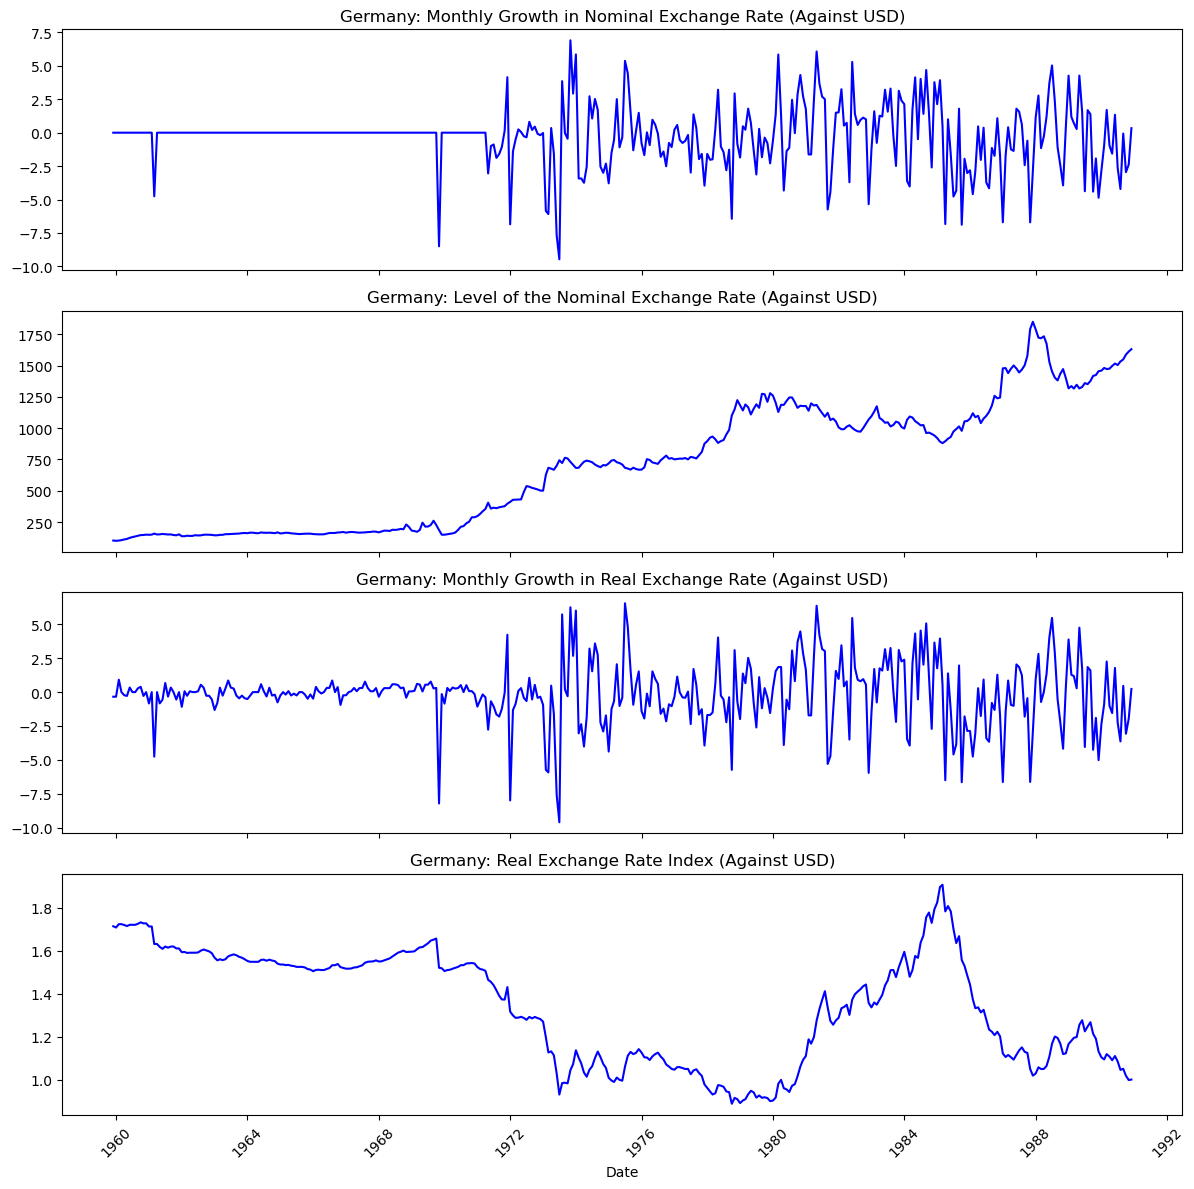

In [24]:
# Filter data for Germany only (since US values are not available)
germany_df = merged_df[merged_df["Country"] == "Germany"]

# Set figure size
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot Monthly Growth in Nominal Exchange Rate
axs[0].plot(germany_df["Date"], germany_df["Nominal Exchange Rate Growth (%)"], color="blue")
axs[0].set_title("Germany: Monthly Growth in Nominal Exchange Rate (Against USD)")

# Plot Level of the Nominal Exchange Rate
axs[1].plot(germany_df["Date"], germany_df["International Reserves Index"], color="blue")
axs[1].set_title("Germany: Level of the Nominal Exchange Rate (Against USD)")

# Plot Monthly Growth in Real Exchange Rate
axs[2].plot(germany_df["Date"], germany_df["Real Exchange Rate Growth (%)"], color="blue")
axs[2].set_title("Germany: Monthly Growth in Real Exchange Rate (Against USD)")

# Plot Real Exchange Rate Index
axs[3].plot(germany_df["Date"], germany_df["Real Exchange Rate Index"], color="blue")
axs[3].set_title("Germany: Real Exchange Rate Index (Against USD)")

# Formatting
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
